<a href="https://colab.research.google.com/github/hildegard984/Curso-Python/blob/main/Exercicios_dia_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#https://www.imdb.com/search/title/?genres=sci-fi&explore=title_type,genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=3396781f-d87f-4fac-8694-c56ce6f490fe&pf_rd_r=5985GH0DWGSJVAS8EFDK&pf_rd_s=center-1&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_pr1_i_2
#WebscrappingIMDB
from requests import get 
import numpy as np
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from warnings import  warn
import pandas as pd

pages = np.arange(1,200,50)#np.arange(pagina inicial, paginal final, incremento de dados pela pagina no caso 50 por pagina)
headers = {'Accept-Language': 'pt-BR,pt;q=0.8'}
titles = []
years = []
genres = []
runtimes = []
imdb_ratings = []
votes = []
ratings = []

for page in pages:
  response = get("https://www.imdb.com/search/title?genres=sci-fi&" + "start=" + str(page) + "&explore=title_type,genres&ref_=adv_prv", headers=headers)
  sleep(randint(5,10))

  if response.status_code !=200:
    warn('O pedido: {}; retornou o codigo: {}'.format(response.status_code))

  page_html = BeautifulSoup(response.text,'html.parser')#função html parser é uma função do beautifulSoup
  movie_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
  for container in movie_containers:
    if container.find('div', class_ = 'ratings-metascore') is not None:
      #captura do título
      title = container.h3.a.text
      titles.append(title)

      #captura do ano
      if container.h3.find('span', class_ = 'lister-item-year text-muted unbold')is not None:
        year = container.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
        years.append(year)
      else:
        years.append(None)
      
      #captura as avaliações
      if container.p.find('span', class_ = 'certificate') is not None:
        rating = container.p.find('span', class_ = 'certificate').text
        ratings.append(rating)
      else:
        ratings.append("")
      
      #captura os generos
      if container.p.find('span', class_ = 'genre') is not None:
        genre = container.p.find('span', class_ = 'genre').text.replace("\n","").rstrip().split(',')#text.replace faz substituição rstrip organiza split separa por algo no caso separa por ','
        genres.append(genre)
      else:
        genres.append("")

      # captura a duração do filme
      if container.p.find('span', class_ = "runtime") is not None:
        time = int(container.p.find('span', class_ = "runtime").text.replace(" min",""))
        runtimes.append(time)
      else:
        runtimes.append(None)
      
      #captura a avaliação do IMdb
      if  container.strong.text is not None:
        imdb = float(container.strong.text.replace(",","."))
        imdb_ratings.append(imdb)
      else:
        imdb_ratings.append(None)
      
      #captura o voto dos usuários
      if container.find('span',attrs = {'name':'nv'})['data-value'] is not None:#dessa vez procuramos por atributos do codigo html não por classe
        vote = int(container.find('span',attrs = {'name':'nv'})['data-value'])
        votes.append(vote);
      else:
        votes.append(None)


In [30]:
sci_fi_df = pd.DataFrame(
    {
        'Filme':titles,
        'Ano':years,
        'Genero':genres,
        'Tempo':runtimes,
        'Imdb':imdb_ratings,
        'Votos':votes,
        'Nota Usuario':ratings,

    }
)
sci_fi_df

,Filme,Ano,Genero,Tempo,Imdb,Votos,Nota Usuario
0,Homem-Formiga e a Vespa: Quantumania,(2023),"[Action, Adventure, Comedy]",124,6.5,78912,12
1,Tudo em Todo Lugar ao Mesmo Tempo,(2022),"[Action, Adventure, Comedy]",139,8.0,347768,14
2,M3gan,(2022),"[Horror, Sci-Fi, Thriller]",102,6.4,76724,14
3,Avatar: O Caminho da Água,(2022),"[Action, Adventure, Fantasy]",192,7.8,311259,14
4,Pantera Negra: Wakanda para Sempre,(2022),"[Action, Adventure, Drama]",161,6.8,233489,12
...,...,...,...,...,...,...,...
90,O Homem de Aço,(2013),"[Action, Adventure, Sci-Fi]",143,7.1,779661,12
91,Prometheus,(I) (2012),"[Adventure, Mystery, Sci-Fi]",124,7.0,616845,16
92,Minority Report: A Nova Lei,(2002),"[Action, Crime, Mystery]",145,7.6,560179,14
93,Watchmen: O Filme,(2009),"[Action, Drama, Mystery]",162,7.6,558485,18


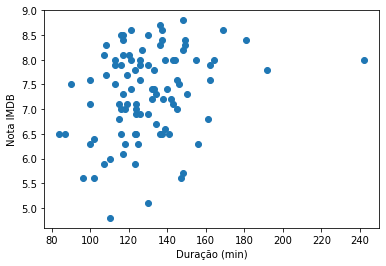

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(sci_fi_df["Tempo"],sci_fi_df["Imdb"])
plt.xlabel("Duração (min)")
plt.ylabel("Nota IMDB")
plt.show()

<AxesSubplot:>

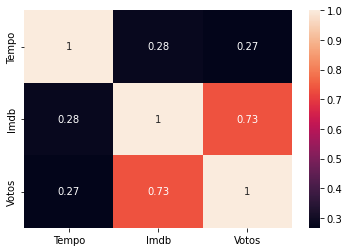

In [32]:
sns.heatmap(sci_fi_df.corr(), annot=True)

[]

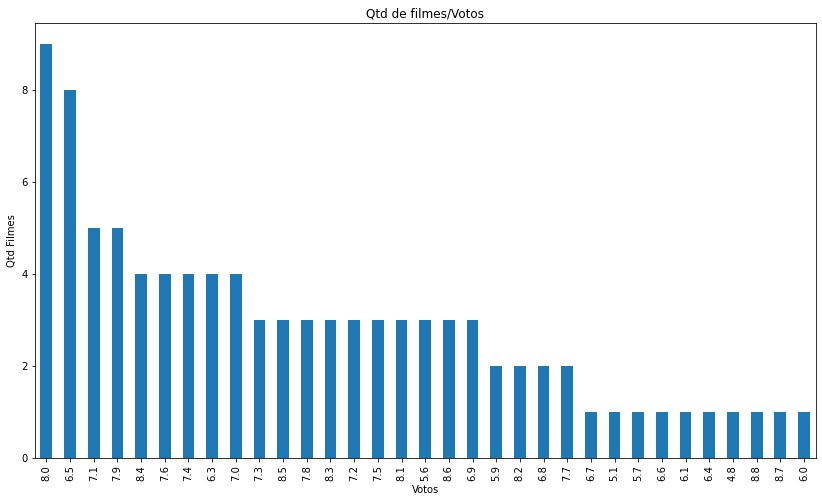

In [33]:
ax = sci_fi_df["Imdb"].value_counts().plot(kind='bar',figsize=(14,8), title = "Qtd de filmes/Votos")
ax.set_xlabel("Votos")
ax.set_ylabel("Qtd Filmes")
ax.plot()

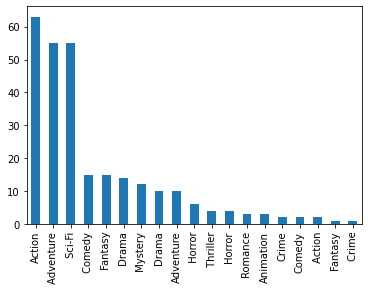

In [34]:
#separar os generos em linha
sci_fi_df_generos = sci_fi_df.explode("Genero")

#contar quantos generos tem
genero_counts = sci_fi_df_generos["Genero"].value_counts()

#construir o grafico de barras
genero_counts.plot(kind="bar")
plt.show()